https://www.mathworks.com/help/stats/copulas-generate-correlated-samples.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sensitivities.stochastic import Uniform, Gaussian, sample_distributions


def bivariate_scatter_hist(x, y, binwidth=0.25):
    # helper functino for visualizing bivariate distribution correlation

    fig, axs = plt.subplot_mosaic(
        [["histx", "."], ["scatter", "histy"]],
        figsize=(6, 6),
        width_ratios=(4, 1),
        height_ratios=(1, 4),
        layout="constrained",
    )

    # no labels
    ax_histx = axs["histx"]
    ax_histy = axs["histy"]

    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # now determine nice limits by hand:
    binwidth = binwidth
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax / binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation="horizontal")

    # the scatter plot:
    axs["scatter"].set_xlim(ax_histx.get_xlim())
    axs["scatter"].set_ylim(ax_histy.get_ylim())
    axs["scatter"].axhline(0, color="black", linewidth=0.5)
    axs["scatter"].axvline(0, color="black", linewidth=0.5)
    axs["scatter"].scatter(x, y, 1, alpha=0.5)


def multivariate_scatter_hist(samples):
    sns.pairplot(pd.DataFrame(samples), diag_kind="hist", kind="scatter", markers=".")

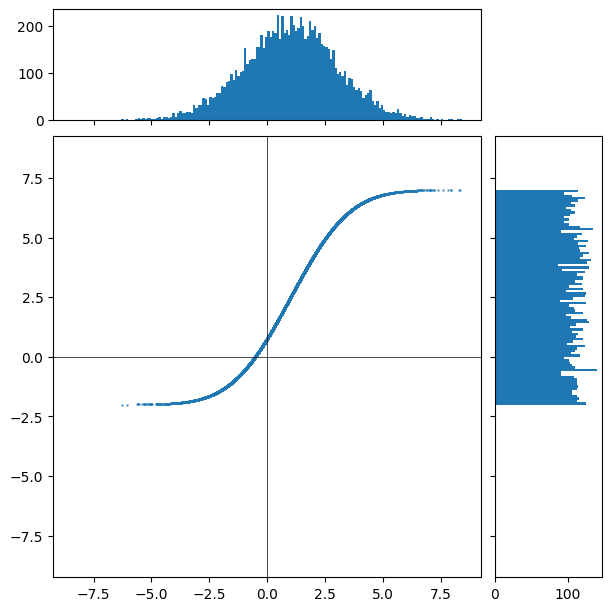

In [6]:
distributions = [
    # Gaussian(mean=1, std=2),
    Gaussian(mean=1, sigma=2),
    Uniform(low=-1, high=2),
    Uniform(low=-2, high=7),
    Uniform(low=-2, high=7),
    # Discrete(options=[1,])
]
corr = np.array([[1, 0, 1, 0], [0, 1, 0, -0.95], [1, 0, 1, 0], [0, -0.95, 0, 1]])

samples = sample_distributions(
    distributions,
    corr=np.array(corr),
    n=10000,
)
bivariate_scatter_hist(samples[:, 0], samples[:, 2], binwidth=0.1)

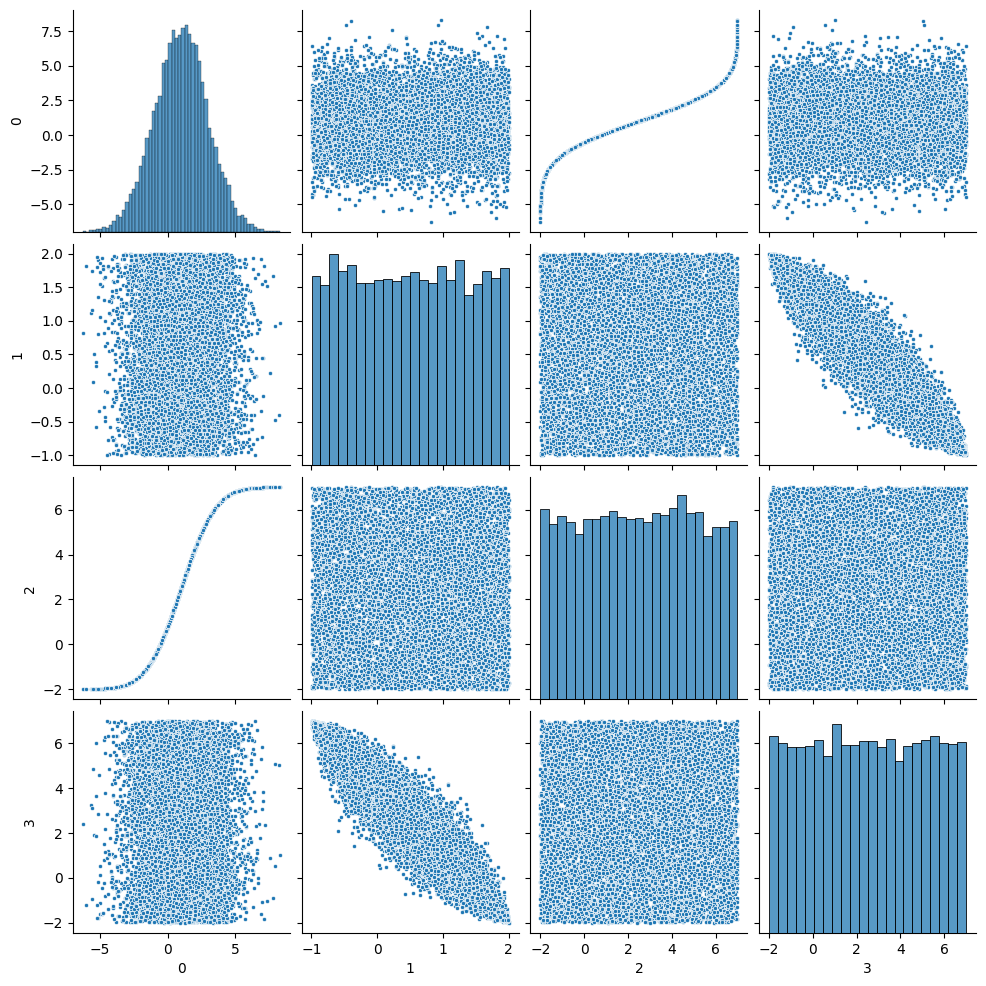

In [7]:
multivariate_scatter_hist(samples)